In [1]:
import nmresearch as nmr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [3]:
colors=['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()

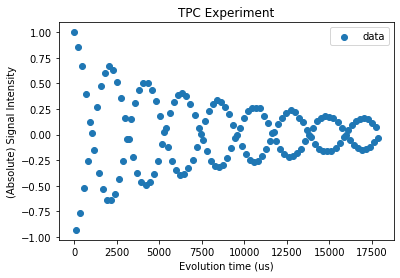

In [4]:
val_offres=nmr.Experiment(328).tpc(add_spline=False)

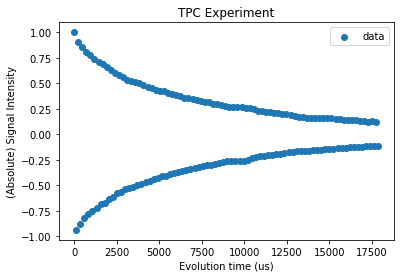

In [5]:
val_good=nmr.Experiment(358).tpc(add_spline=False)

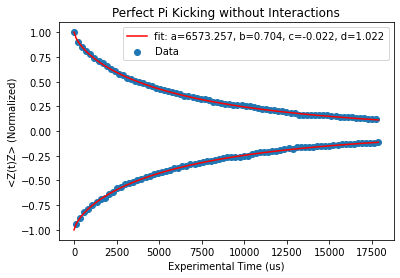

[1.36709579e+02 1.06471836e-02 9.04775918e-03 1.26612724e-02]


In [6]:
decay=abs(val_good)

x = np.arange(0,150)*120

def func(x, a, b, c, d):
    return d*np.exp(- (x / a) ** b ) + c

popt, pcov = curve_fit(func, x, decay, p0=[2000, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))

plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, val_good,label="Data")
plt.title("Perfect Pi Kicking without Interactions")
plt.xlabel("Experimental Time (us)")
plt.ylabel("<Z(t)Z> (Normalized)")
plt.legend()
plt.show()


print(perr)

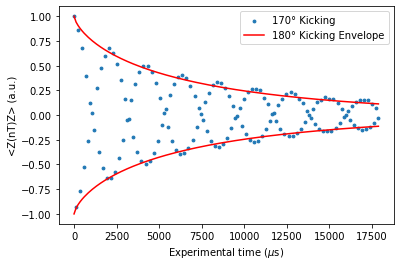

In [7]:
plt.scatter(x,val_offres,s=8,label="170\xb0 Kicking")
plt.plot(x, func(x, *popt), 'r-', label="180\xb0 Kicking Envelope")
plt.plot(x, -func(x, *popt), 'r-')
plt.legend()
plt.xlabel(r"Experimental time ($\mu$s)")
plt.ylabel(r"<Z(nT)Z> (a.u.)")
plt.savefig("nonint.pdf")
plt.show()

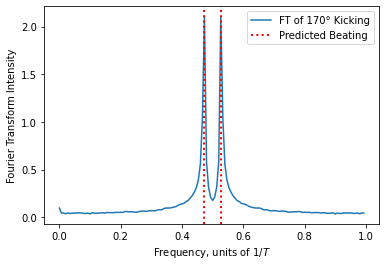

In [8]:
eps=(180-170)/360
cycles=list(range(len(val_offres)))

amp = sp.fft.fft(val_offres,norm="ortho")
freq = [i*(1/(len(cycles))) for i in range(len(cycles))]
plt.plot(freq,abs(amp),label="FT of 170\xb0 Kicking")
plt.axvline(x=.5+eps, ymin=0, color='red', linestyle='dotted', linewidth=2,label="Predicted Beating")
plt.axvline(x=.5-eps, ymin=0, color='red', linestyle='dotted', linewidth=2)
plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel("Fourier Transform Intensity")
plt.legend()
plt.savefig("nonint_beating.pdf")
plt.show()

Ken16, 0 Z-field

In [9]:
vals0=nmr.Experiment(391).load_tpc3d()
kicks=list(range(vals0.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

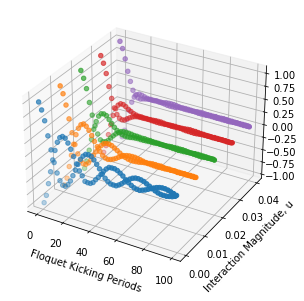

In [10]:
plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[0:5]):
    xline = kicks
    yline = [val for _ in range(len(kicks))]
    zline = vals0[idx]
    ax.scatter3D(xline, yline, zline)

plt.yticks(np.arange(0, 0.05, .01))
plt.xlabel("Floquet Kicking Periods")
plt.ylabel("Interaction Magnitude, u")
plt.show()

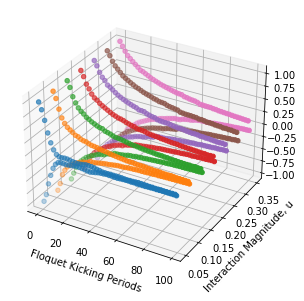

In [11]:
plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[5:12]):
    xline = kicks
    yline = [val for _ in range(len(kicks))]
    zline = vals0[idx+5]
    ax.scatter3D(xline, yline, zline)

plt.xlabel("Floquet Kicking Periods")
plt.ylabel("Interaction Magnitude, u")
plt.show()

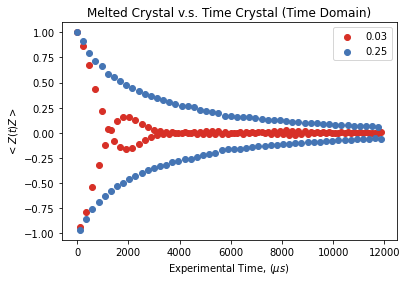

In [12]:
plt.scatter(np.array(kicks)*120,vals0[3],label=cnst2[3],color=colors[0])
plt.scatter(np.array(kicks)*120,vals0[9],label=cnst2[9],color=colors[-1])
plt.legend()
plt.xlabel("Experimental Time, ($\mu s$)")
plt.ylabel("$<Z(t)Z>$")
plt.title("Melted Crystal v.s. Time Crystal (Time Domain)")
plt.savefig('intro_plot.pdf')  
plt.show()

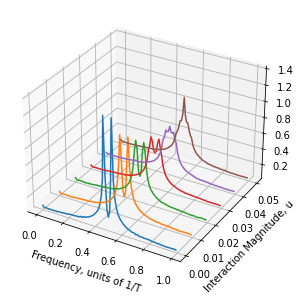

In [15]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals0])

plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[0:6]):
    xline = freq
    yline = [val for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline)

plt.xlabel("Frequency, units of 1/T")
plt.ylabel("Interaction Magnitude, u")
plt.show()

Internal Hamiltonian, 0 Field

In [16]:
vals0ih = nmr.Experiment(437).load_tpc3d()

kicks=list(range(vals0ih.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([2.5, 5, 7.5, 10, 15, 30, 45, 60])/120

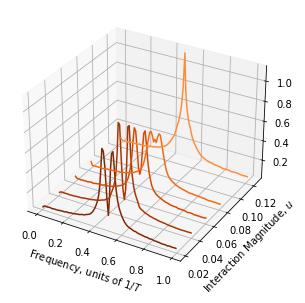

In [17]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals0ih])

plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[0:5]):
    xline = freq
    yline = [val for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline, color=colors_single[idx])

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.savefig("period_double.pdf")
plt.show()

In [18]:
vals0ihv2 = nmr.Experiment(442).load_tpc3d()

kicks=list(range(vals0ihv2.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([10, 11, 12, 13, 14, 15, 60, 90, 120])/120

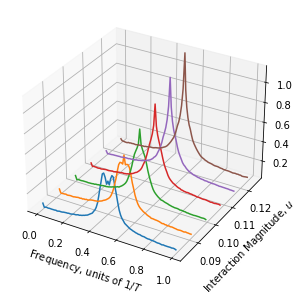

In [19]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals0ihv2])

plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[0:6]):
    xline = freq
    yline = [val for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline)

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.show()

Variable Interaction strength, variable kicking angle, no Z field

NameError: name 'Y' is not defined

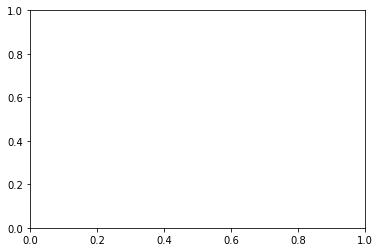

In [20]:
cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
kicks=np.arange(0,100)
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
theta = [160,165,170,175]
eps = [(180-ang)/360 for ang in theta]

res = np.zeros( (4,len(cnst2)) )
off_res = np.zeros( (4,len(cnst2)) )

# 160
vals160=nmr.Experiment(393).load_tpc3d()

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals160])
off_res[0] = np.array([ft[44] for ft in fourier])
res[0] = np.array([ft[50] for ft in fourier])


# 165
vals165=nmr.Experiment(402).load_tpc3d()

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals165])
off_res[1] = np.array([ft[46] for ft in fourier])
res[1] = np.array([ft[50] for ft in fourier])


# 170
vals170=nmr.Experiment(391).load_tpc3d()

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals170])
off_res[2] = np.array([ft[47] for ft in fourier])
res[2] = np.array([ft[50] for ft in fourier])


# 175
vals175=nmr.Experiment(398).load_tpc3d()

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals175])
off_res[3] = np.array([ft[49] for ft in fourier])
res[3] = np.array([ft[50] for ft in fourier])


fig, ax = plt.subplots()
Z = -1*(off_res-res)
z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()
c = ax.pcolormesh(Y, X, Z, cmap='RdBu', vmin=z_min, vmax=z_max)
fig.colorbar(c, ax=ax,label="Fourier peak difference")
xp = np.linspace(.0, .07, 100)
plt.plot(xp, xp*(1.987)-0.017,"k--", label="Boundary")
plt.xlabel(r"$\epsilon$ detuning from $\pi$ kicking")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.xlim([0.007,0.062])
plt.ylim([-0.005,0.375])
plt.show()

In [23]:
vals=nmr.Experiment(447).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]

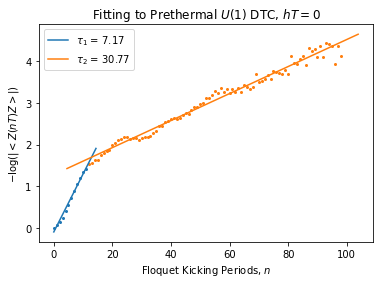

In [24]:
x=kicks
y=-np.log(abs(vals[2]))
cut = 12

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=0$")
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
plt.show()

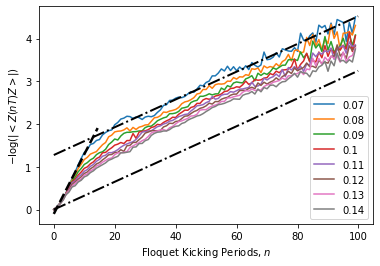

In [25]:
plt.plot(-np.log(abs(vals[2:-1].transpose())),label=cnst2[2:-1])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'k-.',linewidth=2)
plt.plot(x,x*p2[0]+p2[1],'k-.',linewidth=2)
plt.plot(x1,f1,'k--',linewidth=2.5)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|<Z(nT)Z>|)$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.show()

In [75]:
colors=['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()

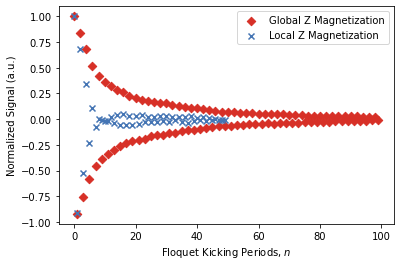

In [54]:
vals_local=nmr.Experiment(455).load_tpc3d()
vals_global = nmr.Experiment(451).load_tpc3d()

plt.scatter(list(range(100)), vals_global[10], label=r"Global Z Magnetization",color=colors[0],marker="D")
plt.scatter(list(range(50)), vals_local[10], label=r"Local Z Magnetization",color=colors[-1],marker="x")
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Normalized Signal (a.u.)")
plt.savefig('local_v_global_1.pdf')  
plt.show()

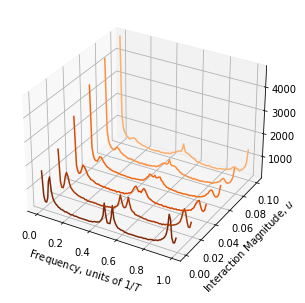

In [61]:
valsdip=nmr.Experiment(459).load_tpc3d(dipolar=True,normalize=False)
cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
kicks=list(range(100))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in valsdip])


plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx in [0,2,4,6,8,10]:
    xline = freq
    yline = [cnst2[idx] for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline,color=colors_single[int(idx/2)])

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$")
plt.savefig('dipolar_freq.pdf')  
plt.show()

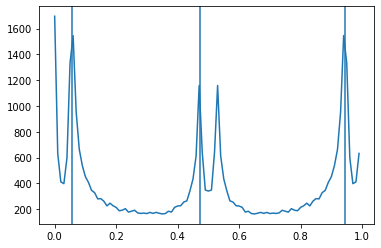

In [62]:
plt.plot(freq,fourier[0])
plt.axvline(x = 2*eps)
plt.axvline(x=1-2*eps)
plt.axvline(x=1/2-eps)

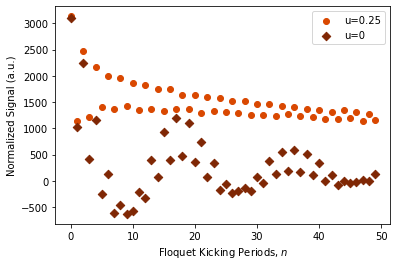

In [63]:
valsdip2=nmr.Experiment(255).load_tpc3d(dipolar=True,normalize=False)
cnst2=np.array([5,10,15,30,45,60])/120

idx=3
plt.scatter(list(range(50)),valsdip2[idx],label="u="+str(cnst2[idx]),color=colors_single[2])
plt.scatter(list(range(50)),valsdip[0][0:50],label="u=0",color=colors_single[0],marker="D")
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Normalized Signal (a.u.)")
plt.savefig('dipolar_timedom.pdf')
plt.show()

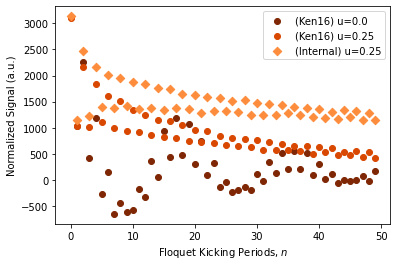

In [64]:
valsdip1=nmr.Experiment(464).load_tpc3d(dipolar=True,normalize=False)
cnst2=[0,0.05,0.1,0.15,0.2,0.25,0.3]

plt.scatter(list(range(50)),valsdip1[0][0:50],label="(Ken16) u=0.0",color=colors_single[0])
plt.scatter(list(range(50)),valsdip1[5][0:50],label="(Ken16) u=0.25",color=colors_single[2])
plt.scatter(list(range(50)),valsdip2[3],label="(Internal) u=0.25",color=colors_single[4],marker="D")
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Normalized Signal (a.u.)")
plt.savefig('dipolar_timedom.pdf')
plt.show()

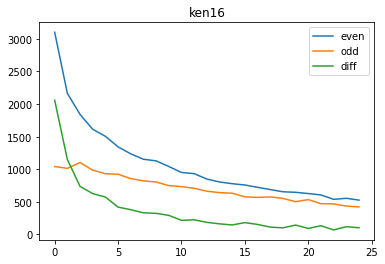

In [81]:
test=valsdip1[5][0:50]
plt.plot(test[0:50:2],label="even")
plt.plot(test[1:50:2],label="odd")
plt.plot(test[0:50:2]-test[1:50:2],label="diff")
plt.legend()
plt.title("ken16")
plt.show()

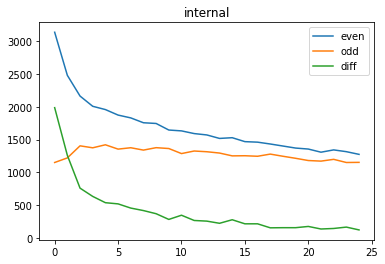

In [82]:
test=valsdip2[3]
plt.plot(test[0:50:2],label="even")
plt.plot(test[1:50:2],label="odd")
plt.plot(test[0:50:2]-test[1:50:2],label="diff")
plt.legend()
plt.title("internal")
plt.show()